# Inštalácia knižnice rasterio

In [ ]:
#Inštalacia knižnice rasterio
!pip install rasterio

In [ ]:
#Výpis všetkých nainštalovaných modulov/knižníc.
!pip list

In [8]:
#Aka verzia knižnice rasterio je nainštalovaná 
print(f"Verzia kniznice rasterio: {rasterio.__version__}")

Verzia kniznice rasterio: 1.3.6


# Načítanie rastrových dát

In [1]:
import rasterio

In [3]:
# Vytvorenie premennej na načítanie vstupného rastra
in_img = r"C:\\Users\\Róbert Sásik\\_SCRIPTS_\\GIS\\raster\\dmp.tif"
# Vytvorenie premennej otvorenie rastra pomocou funkcie rasterio.open()
ds = rasterio.open(in_img)
ds

# Následné prečítanie rastra 
data = ds.read()
data
# print(data)

array([[[703.79, 703.02, 699.  , ..., 538.43, 538.33, 538.25],
        [702.35, 698.76, 699.05, ..., 538.44, 538.34, 538.28],
        [701.31, 698.74, 699.13, ..., 538.43, 538.37, 538.25],
        ...,
        [644.86, 644.19, 643.72, ..., 535.46, 535.05, 534.62],
        [645.5 , 645.2 , 644.4 , ..., 537.05, 535.45, 534.96],
        [648.76, 649.02, 644.21, ..., 536.37, 535.82, 536.76]]],
      dtype=float32)

# Načítanie metadát rastra

In [4]:
#Načítanie metadát vo formáte slovník/json

ds_dict = dict(ds.meta)
# print(ds_dict)
#Prehľadné vypísanie metadát pomocou cyklu for 
for key in ds_dict:
    print (key, ":", ds_dict[key])

driver : GTiff
dtype : float32
nodata : -3.4028230607370965e+38
width : 2173
height : 1648
count : 1
crs : LOCAL_CS["S_JTSK_JTSK03_Krovak_East_North",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
transform : | 1.00, 0.00,-438391.00|
| 0.00,-1.00,-1257364.00|
| 0.00, 0.00, 1.00|


In [5]:
#Zistenie cesty k súboru rastra a jeho meno
print(ds.name)

C:/Users/Róbert Sásik/_SCRIPTS_/GIS/raster/dmp.tif


In [30]:
#Z kolkych Raster Bands sa sklada Raster dataset
print(ds.count)

1


In [6]:
#Rozlíšenie rastra (riadky, stĺpce)
print(ds.shape)

(1648, 2173)


In [7]:
#Rozlíšenie rastra (riadky)
print(ds.height)

#Rozlíšenie rastra (stĺpce)
print(ds.width)

1648
2173


In [8]:
#Ovládač rastra - driver
print(ds.driver)

GTiff


In [48]:
#Súradnicový systém
print(ds.crs)

LOCAL_CS["S_JTSK_JTSK03_Krovak_East_North",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [9]:
#transformácia
print(ds.transform)

ds.transform

| 1.00, 0.00,-438391.00|
| 0.00,-1.00,-1257364.00|
| 0.00, 0.00, 1.00|


Affine(1.0, 0.0, -438391.0000000015,
       0.0, -1.0, -1257363.999999994)

In [10]:
#Popis
print(ds.descriptions)

(None,)


In [63]:
#Velkost dat
print(data.size)

3581104


In [11]:
#Zistenie dátového typu

print(f"Datovy typ rastra je: {data.dtype}")


Datovy typ rastra je: float32


In [78]:
#Zistenie minimálnej hodnoty bunky rastra
print("Minimalna hodnota bunky rastra je:", data.min())

Minimalna hodnota bunky rastra je: 513.65


In [12]:
#Zistenie maximálnej hodnoty bunky rastra
print("Maximálna hodnota bunky rastra je:", data.max())

Maximálna hodnota bunky rastra je: 750.58


# Vizualizácia rastra

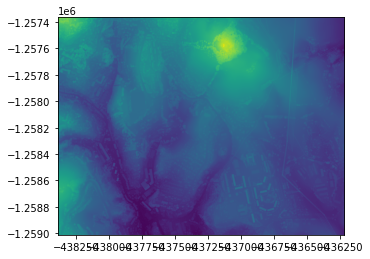

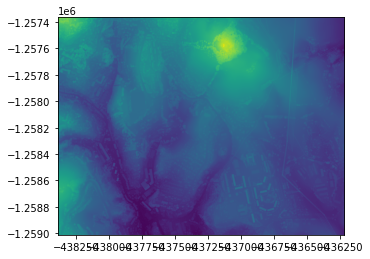

AxesSubplot(0.18066,0.125;0.663679x0.755)


In [13]:
from rasterio.plot import show
#Zobrazenie rastra s predvolenou farebnou škálou.

show(ds)
print(show(ds))

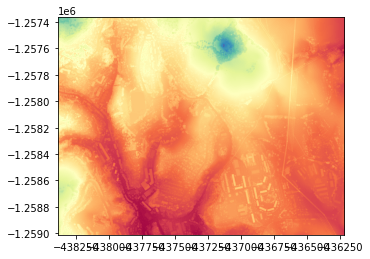

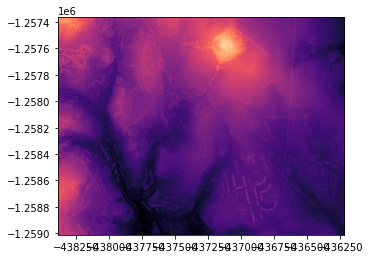

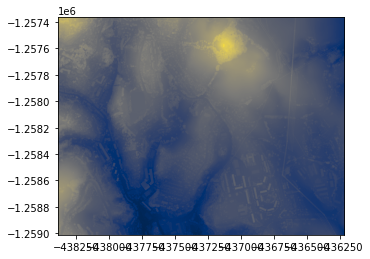

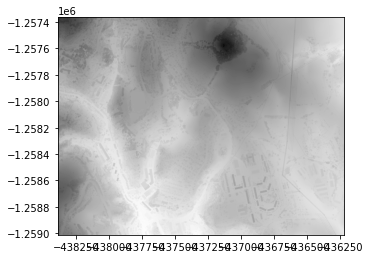

<AxesSubplot:>

In [14]:
#Zmena farebnej škály pomocou parametra cmap.
#Názvy farebných škál na: https://matplotlib.org/stable/tutorials/colors/colormaps.html
show(ds, cmap="Spectral")
show(ds, cmap="magma")
show(ds, cmap="cividis")
show(ds, cmap="binary")

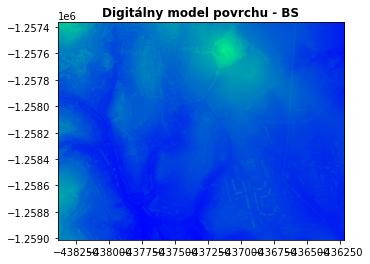

<AxesSubplot:title={'center':'Digitálny model povrchu - BS'}>

In [15]:
#Nadpis - pomocou parametra title
show(ds, cmap="winter", title="Digitálny model povrchu - BS")

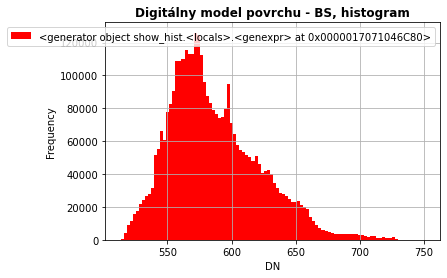

In [16]:
#Zobrazenie histogramu rastra
#bins - hustota histogramu
#Početnosť pixelov nad hodnotami nadmorských výšok
from rasterio.plot import show, show_hist
show_hist(ds, bins=100, title="Digitálny model povrchu - BS, histogram")

# Zápis (export) rastrových dát

In [ ]:
#Nastavenie výstupných parametrov pre export rastra a následný zápis. 
with rasterio.open(r'C:\Users\Róbert Sásik\_SCRIPTS_\GIS\raster\output\dmr_bs_out.tif','w',
                  driver=ds.driver,
                  heigh=ds.height,
                  width=ds.width,
                  count=ds.count,
                  crs=ds.crs,
                  transform=ds.transform,
                  dtype=data.dtype,
                  ) as dst:
    dst.write(data)